# Homework #5  (Due 30 December 2024)

## Part-1

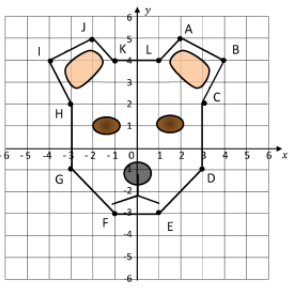

You will be applying a transformation on a set of points of the following image (50 points).
<br>
a) Find the matrix that represents a rotation of +30 degrees in homogeneous coordinates. Perform a rotation of +30 degrees on the points and plot them. <br>
b) Find the matrix that represents a translation of 4 units in x direction, 1 unit in y direction. Perform a translation in x of 4 units and a translation in y of 1 unit over the points previously rotated. Plot the new points.<br>
c) Find a transformation that represents the operation of rotation of +30 degrees after a translation of 4 units in x, 1 unit in y. Plot your points. <br>
d) Compare the results of (b) and (c). Are they the same? Write your comments.<br>
e) Apply +20 degrees rotation, (x,y)=[2,1] units of translation, -40 degrees rotation and (x,y)=[1,-2] units of translation in this order. But do not apply these separately. First obtain a single 3x3 transformation matrix T for all the operations given above. Then apply this T to the points once. Plot new points.

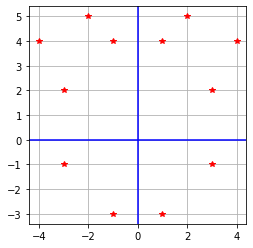

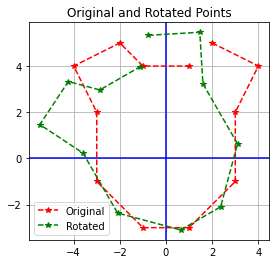

In [29]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt

# define your points as homogeneuos coordinates (3 coordinates).
points = np.array([[2,5,1],[4,4,1],[3,2,1],[3,-1,1],[1,-3,1],[-1,-3,1],[-3,-1,1],[-3,2,1],[-4,4,1],[-2,5,1],[-1,4,1],[1,4,1]])

# Make the points be in columns (you need to transpose them)
points = points.transpose()

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:],points[1,:],'r*')

def rotation_matrix_func(theta):
    return np.array([
            [np.cos(theta), -np.sin(theta), 0],
            [np.sin(theta), np.cos(theta), 0],
            [0, 0, 1]
            ])

# a)
rotation_matrix = rotation_matrix_func(np.radians(30))
rotated_points = rotation_matrix @ points

fig, ax = plt.subplots()
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue') 

ax.plot(points[0, :], points[1, :], 'r--*', label='Original')  

ax.plot(rotated_points[0, :], rotated_points[1, :], 'g--*', label='Rotated')  

ax.legend()
plt.title("Original and Rotated Points")
plt.show()

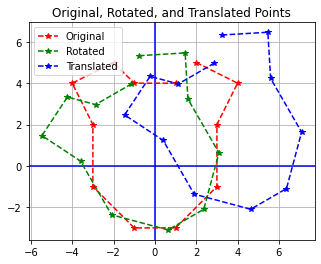

In [30]:
# b)

def translation_matrix_func(x,y):
    return np.array([
            [1, 0, x],  
            [0, 1, y], 
            [0, 0, 1]   
        ])
    
translation_matrix = translation_matrix_func(4,1)

translated_points = translation_matrix @ rotated_points

fig, ax = plt.subplots()
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')

ax.plot(points[0, :], points[1, :], 'r--*', label='Original')

ax.plot(rotated_points[0, :], rotated_points[1, :], 'g--*', label='Rotated')

ax.plot(translated_points[0, :], translated_points[1, :], 'b--*', label='Translated')

ax.legend()
plt.title("Original, Rotated, and Translated Points")
plt.show()


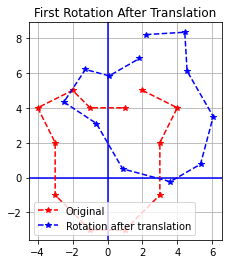

In [31]:
# c)
rotation_after_translation =  rotation_matrix @ translation_matrix

result_matrix =  rotation_after_translation @ points

fig, ax = plt.subplots()
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')

ax.plot(points[0, :], points[1, :], 'r--*', label='Original')

ax.plot(result_matrix[0, :], result_matrix[1, :], 'b--*', label='Rotation after translation')

plt.legend()
plt.title("First Rotation After Translation")
plt.show()


d) 
- In the "Translation After Rotation" sequence, the shape is first rotated around the origin (0, 0) and then translated to a new position, maintaining the origin as the rotation center throughout the process. In contrast, the "Rotation After Translation" sequence translates the shape to a new position away from the origin and then rotates it. In this case, the shape rotates around the origin (0, 0) in its translated position, resulting in a different visual outcome. This difference shows how the order of transformations impacts the result. The rotation center and sequence directly affect the shape's positioning.

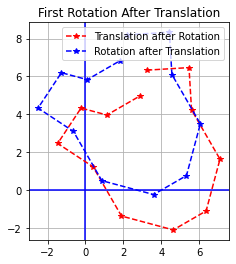

In [32]:
fig, ax = plt.subplots()
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')

ax.plot(translated_points[0, :], translated_points[1, :], 'r--*', label='Translation after Rotation')

ax.plot(result_matrix[0, :], result_matrix[1, :], 'b--*', label='Rotation after Translation')

plt.legend()
plt.title("First Rotation After Translation")
plt.show()

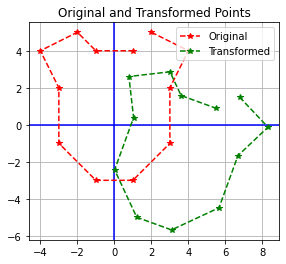

In [33]:
# e)

rotation_matrix1 = rotation_matrix = rotation_matrix_func(np.radians(20))

translation_matrix1 = translation_matrix = translation_matrix_func(2,1)

rotation_matrix2 = rotation_matrix = rotation_matrix_func(np.radians(-40))

translation_matrix2 = translation_matrix = translation_matrix_func(1,-2)


combined_matrixx = translation_matrix2 @ rotation_matrix2 @ translation_matrix1 @ rotation_matrix1

result_e = combined_matrixx @ points

fig, ax = plt.subplots()
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')
ax.axvline(0, color='blue')

ax.plot(points[0, :], points[1, :], 'r--*', label='Original')

ax.plot(result_e[0, :], result_e[1, :], 'g--*', label='Transformed')

ax.legend()
plt.title("Original and Transformed Points")
plt.show()


## Part-2

Now you will estimate the homography between a pair of images (50 points).

In our case, the transformation is a homography: $p’=Hp$,
where:
* $(p’,p)$ are pairs of corresponding points taken from the two images.  
* $H$ is a 3x3 matrix with 8 degrees of freedom (lower right corner is a scaling factor and can be set to 1). <br>

a) Take four corresponding points from the given images (img1.png and img2.png) and plot them on the images. <br>

b) Construct matrix $A$ for the following formulation $Ah=0$. <br>


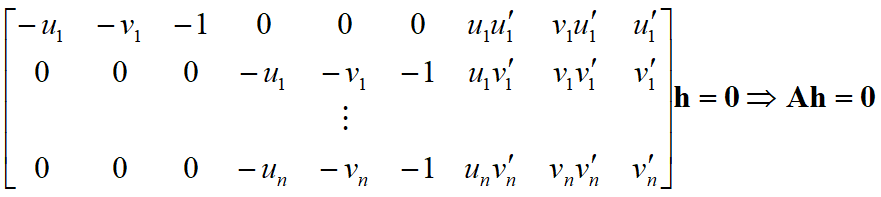



c) Apply SVD (singular value decomposition) using np.linalg.svd and obtain $h$. Then reshape $h$ to obtain 3x3 homography matrix $H$. <br>

d) Test your estimated $H$. Select 3 new different points manually from the first image. Apply $H$ to them. And plot the results in the second image. Do they fall on the correct/corresponding locations? Write your comments.
<br>

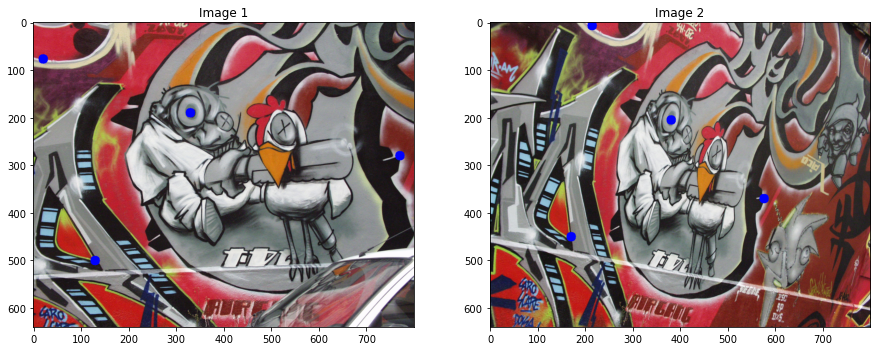

In [38]:
# a) 
import cv2

img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')

first_image_points = np.array([
    [21, 77],   
    [130, 500],  
    [770, 280], 
    [330, 190]   
])

second_image_points = np.array([
    [214, 7],   
    [170, 450],  
    [575, 370], 
    [380, 205]   
])

image_1_with_points = img1.copy()
for pt in first_image_points:
    cv2.circle(image_1_with_points, (int(pt[0]), int(pt[1])), 10, (255, 0, 0), -1)

image_2_with_points = img2.copy()
for pt in second_image_points:
    cv2.circle(image_2_with_points, (int(pt[0]), int(pt[1])), 10, (255, 0, 0), -1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_1_with_points, cv2.COLOR_BGR2RGB))
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_2_with_points, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.show()

In [39]:
# b)
A = []

for (u, v), (u_prime, v_prime) in zip(first_image_points, second_image_points):
    A.append([-u, -v, -1, 0, 0, 0, u_prime * u, u_prime * v, u_prime])
    A.append([0, 0, 0, -u, -v, -1, v_prime * u, v_prime * v, v_prime])

A = np.array(A)

print(A)


[[   -21    -77     -1      0      0      0   4494  16478    214]
 [     0      0      0    -21    -77     -1    147    539      7]
 [  -130   -500     -1      0      0      0  22100  85000    170]
 [     0      0      0   -130   -500     -1  58500 225000    450]
 [  -770   -280     -1      0      0      0 442750 161000    575]
 [     0      0      0   -770   -280     -1 284900 103600    370]
 [  -330   -190     -1      0      0      0 125400  72200    380]
 [     0      0      0   -330   -190     -1  67650  38950    205]]


In [40]:
# c)
U, S, Vt = np.linalg.svd(A)

H = Vt[-1].reshape(3, 3)

print(H)


[[ 3.43711899e-03 -1.40164429e-03  9.52890530e-01]
 [ 1.66531401e-03  3.87350803e-03 -3.03231694e-01]
 [ 1.97429916e-06 -9.21454371e-07  4.31520861e-03]]


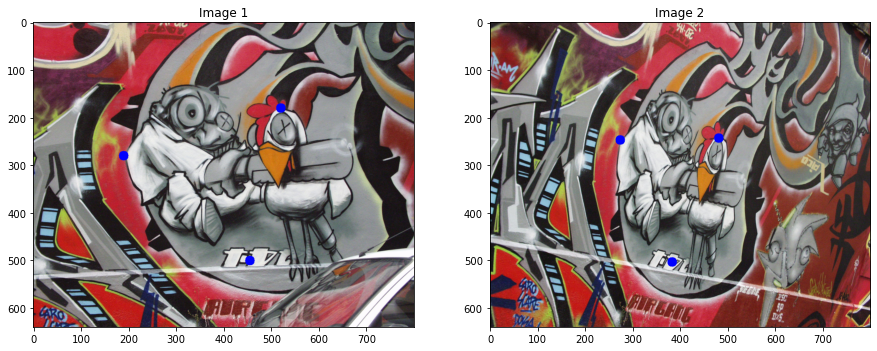

In [42]:
# d)

new_points_img1 = np.array([
                    [190, 280], 
                    [455, 500], 
                    [520, 180],   
                    ])

new_points_img1_h = np.hstack([new_points_img1, np.ones((new_points_img1.shape[0], 1))])

new_transformed_points_h = (H @ new_points_img1_h.T).T

new_transformed_points = new_transformed_points_h[:, :2] / new_transformed_points_h[:, 2].reshape(-1, 1)

image_1_with_points = img1.copy()
for pt in new_points_img1:
    cv2.circle(image_1_with_points, (int(pt[0]), int(pt[1])), 10, (255, 0, 0), -1)

image_2_with_points = img2.copy()
for pt in new_transformed_points:
    cv2.circle(image_2_with_points, (int(pt[0]), int(pt[1])), 10, (255, 0, 0), -1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_1_with_points, cv2.COLOR_BGR2RGB))
plt.title("Image 1")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_2_with_points, cv2.COLOR_BGR2RGB))
plt.title("Image 2")
plt.show()


- I tested the homography matrix H by selecting three new points from the first image and transforming them using H. After plotting these transformed points on the second image, I saw that they match their corresponding locations really well. This shows that the homography matrix H  works correctly and captures the transformation between the two images effectively.